In [317]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [318]:
df = pd.read_csv(r'C:\Users\User\Documents\car_price.csv',index_col = 0)
df.head()


,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [319]:
df.shape

(117927, 10)

In [320]:
df["mark"].unique()

array(['opel', 'audi', 'bmw', 'volkswagen', 'ford', 'mercedes-benz',
       'renault', 'toyota', 'skoda', 'alfa-romeo', 'chevrolet', 'citroen',
       'fiat', 'honda', 'hyundai', 'kia', 'mazda', 'mini', 'mitsubishi',
       'nissan', 'peugeot', 'seat', 'volvo'], dtype=object)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117927 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   mark             117927 non-null  object
 1   model            117927 non-null  object
 2   generation_name  87842 non-null   object
 3   year             117927 non-null  int64 
 4   mileage          117927 non-null  int64 
 5   vol_engine       117927 non-null  int64 
 6   fuel             117927 non-null  object
 7   city             117927 non-null  object
 8   province         117927 non-null  object
 9   price            117927 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 9.9+ MB


In [322]:
df.drop("generation_name",axis=1,inplace=True)  #we drop the genration_name column because it has missing values (87842) 
                                         #compared to the others(117927)

In [323]:
df.isna().sum()  #0 na values

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [324]:
df.isnull().sum()  #0 null values

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [325]:
df.drop_duplicates(keep='first', inplace=True) #deleting duplicate rows and keeping first occurence (keep="first")

In [326]:
df.shape

(111166, 9)

In [327]:
df["price_usd"]= df["price"] * 0.22   #changing prices from zloty(poland currency) to usd
df.drop(columns=["city","province","price"],axis=1,inplace =True) # not useful columns
df.head()


,mark,model,year,mileage,vol_engine,fuel,price_usd
0,opel,combo,2015,139568,1248,Diesel,7898.00
1,opel,combo,2018,31991,1499,Diesel,17270.22
2,opel,combo,2015,278437,1598,Diesel,5940.00
3,opel,combo,2016,47600,1248,Diesel,6776.00
4,opel,combo,2014,103000,1400,CNG,7898.00


In [328]:
size_model = list(df["model"].unique())
len(size_model)

328

In [329]:
df.drop("model",axis=1,inplace=True)  #328 different models so we drop the model column
df.head()

,mark,year,mileage,vol_engine,fuel,price_usd
0,opel,2015,139568,1248,Diesel,7898.00
1,opel,2018,31991,1499,Diesel,17270.22
2,opel,2015,278437,1598,Diesel,5940.00
3,opel,2016,47600,1248,Diesel,6776.00
4,opel,2014,103000,1400,CNG,7898.00


DEALING WITH OUTLIERS

<AxesSubplot:>

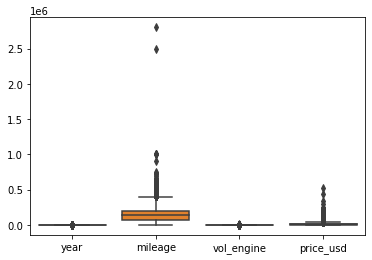

In [330]:
sns.boxplot(data=df)             #mileage and price_usd have many outliers

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

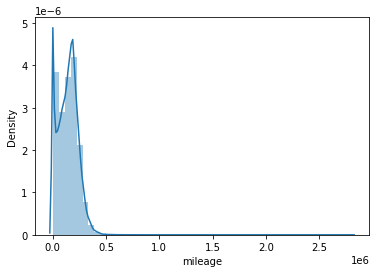

In [331]:
sns.distplot(df["mileage"])     #right skewed

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_usd', ylabel='Density'>

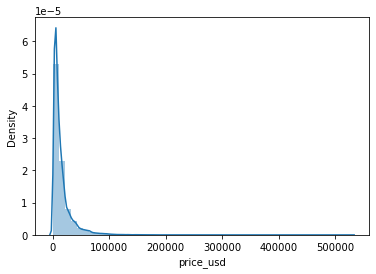

In [332]:
sns.distplot(df["price_usd"])   #right skewed

REMOVING OUTLIERS 

In [333]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)                  #because our 2 density plots are skewed we can take values between Q1-1.5*IQR and Q3+1.5*IQR
    IQR = Q3 - Q1
    
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR
    ls= df.index[(df[ft] < low_bound) | (df[ft]> up_bound)]
    return ls

In [334]:
index_list = []
for feature in ['price_usd','mileage']:
    index_list.extend(outliers(df,feature))
index_list

[5032,
 5825,
 5834,
 5859,
 5868,
 5869,
 5879,
 5881,
 5890,
 5891,
 5894,
 5902,
 5915,
 5917,
 5921,
 5928,
 5931,
 5941,
 8689,
 8771,
 8809,
 8818,
 8846,
 8919,
 8936,
 8948,
 8997,
 12512,
 12545,
 13752,
 13756,
 13771,
 13782,
 13784,
 13839,
 13844,
 13895,
 14037,
 14039,
 14042,
 14048,
 14049,
 14051,
 14058,
 14061,
 14065,
 14069,
 14076,
 14077,
 14080,
 14082,
 14084,
 14087,
 14088,
 14096,
 14097,
 14100,
 14101,
 14102,
 14104,
 14105,
 14108,
 14109,
 14110,
 14112,
 14117,
 14118,
 15374,
 15912,
 16148,
 16400,
 16405,
 16411,
 16413,
 16420,
 16421,
 16429,
 16430,
 16446,
 16447,
 16453,
 16457,
 16459,
 16461,
 16464,
 16467,
 16468,
 16474,
 16483,
 16485,
 16487,
 16488,
 16492,
 16500,
 16502,
 16503,
 16505,
 16508,
 16515,
 16517,
 16518,
 16519,
 16522,
 16525,
 16528,
 16529,
 16530,
 16533,
 16534,
 16535,
 16536,
 16538,
 16539,
 16540,
 16541,
 16542,
 16543,
 16569,
 16573,
 16576,
 16578,
 16579,
 16583,
 16585,
 16589,
 16590,
 16596,
 16605,
 16

In [335]:
def remove(df,ls):
    ls = sorted(set(ls))
    df=df.drop(ls)
    return df
df = remove(df,index_list)
    

<AxesSubplot:>

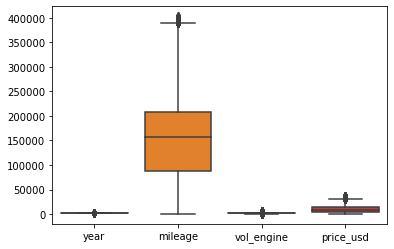

In [336]:
sns.boxplot(data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_usd', ylabel='Density'>

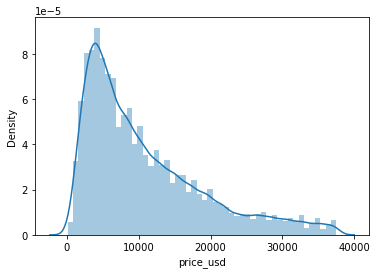

In [337]:
sns.distplot(df["price_usd"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


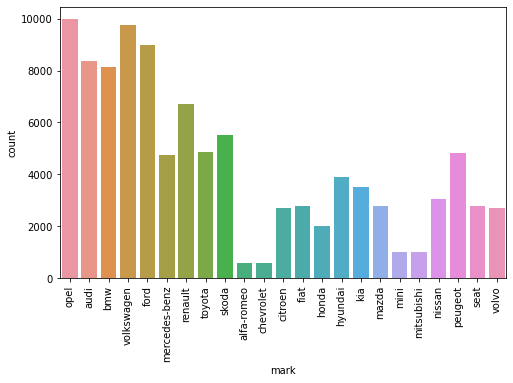

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


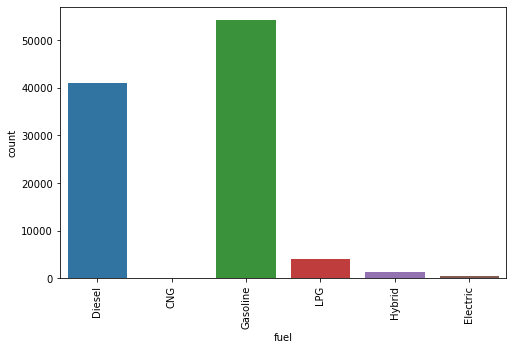

In [338]:
for column in df.columns:
    if df[column].dtype== 'object':  #top 4 cars are german cars ----> poland citizens like to drive german cars
        plt.figure(figsize=(8,5))    #most of the cars drive on gasoline and diesel
        sns.countplot(df[column])
        plt.xticks(rotation='90')
        plt.show()

Text(0.5, 1.0, 'Mark and Price')

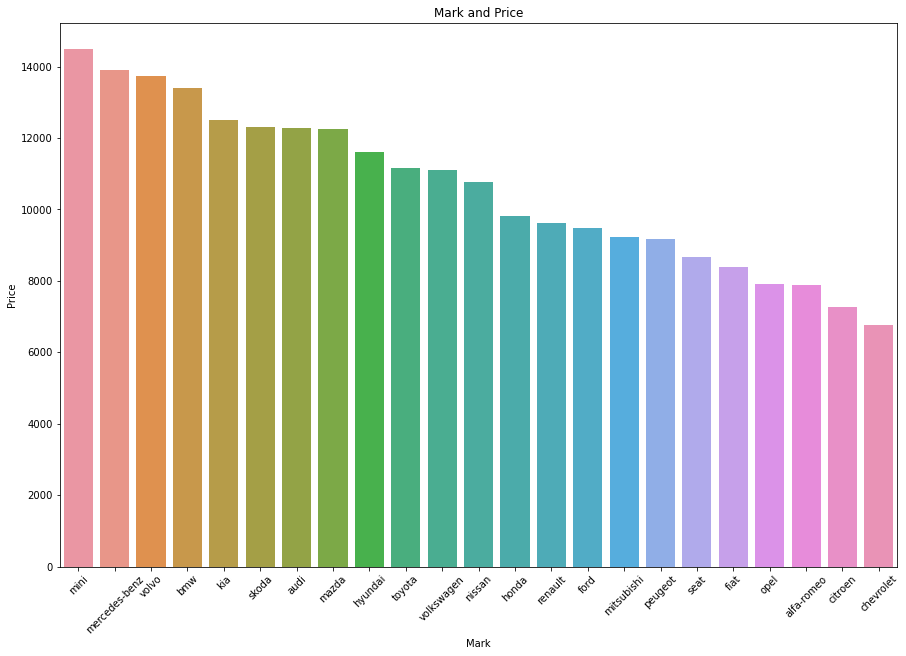

In [339]:
mark_list = list(df['mark'].unique())                  #ploting the average price of each car in descending order
mark_price = []
for i in mark_list:
    x = df[df['mark']==i]                              # 4 of the top 5 average car prices are german cars 
    price = sum(x.price_usd)/len(x)
    mark_price.append(price)
data = pd.DataFrame({'mark_list': mark_list,'mark_price':mark_price})
new_index = (data['mark_price'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['mark_list'], y=sorted_data['mark_price'])
plt.xticks(rotation= 45)
plt.xlabel('Mark')
plt.ylabel('Price')
plt.title('Mark and Price')

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'mileage'}>],
       [<AxesSubplot:title={'center':'vol_engine'}>,
        <AxesSubplot:title={'center':'price_usd'}>]], dtype=object)

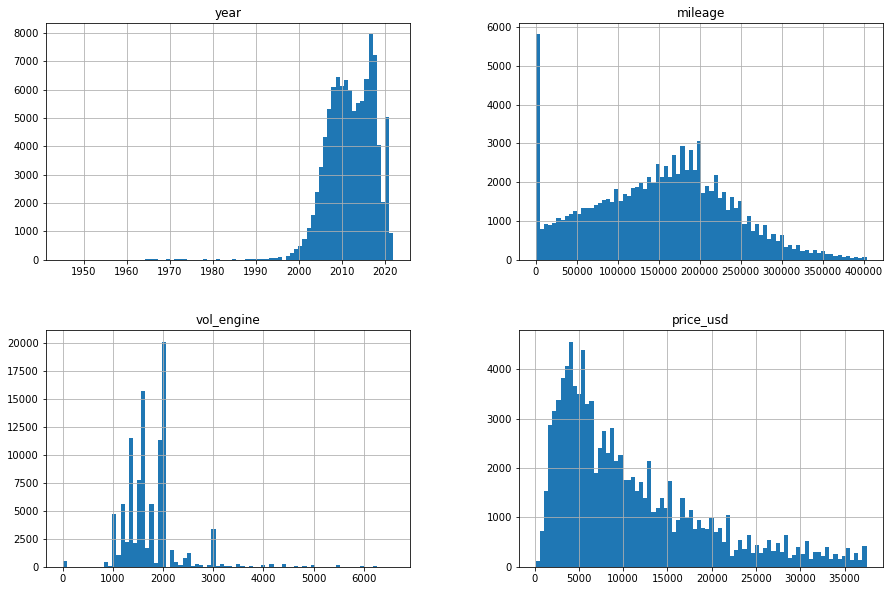

In [340]:
df.hist(bins=80, figsize=(15, 10))

In [341]:
corr_matrix = df.corr()
corr_matrix["price_usd"].sort_values(ascending=False)     #price is correlated with year and mileage
                                                          #we can drop vol_engine column because it wont affect  our output

price_usd     1.000000
year          0.736598
vol_engine    0.109481
mileage      -0.597390
Name: price_usd, dtype: float64

In [342]:
df.drop("vol_engine",axis=1,inplace=True)
df.drop("fuel",axis=1,inplace=True)

Multicollinearity  

In [343]:
#The dependent variable should have a strong relationship with independent variables.
#However, any independent variables should not have strong correlations among other independant variables

df.corr().style.background_gradient(cmap='coolwarm')    

,year,mileage,price_usd
year,1.000000,-0.691391,0.736598
mileage,-0.691391,1.000000,-0.597390
price_usd,0.736598,-0.597390,1.000000


In [344]:
df.head()


,mark,year,mileage,price_usd
0,opel,2015,139568,7898.00
1,opel,2018,31991,17270.22
2,opel,2015,278437,5940.00
3,opel,2016,47600,6776.00
4,opel,2014,103000,7898.00


In [345]:
df.corr().style.background_gradient(cmap='coolwarm')    

,year,mileage,price_usd
year,1.000000,-0.691391,0.736598
mileage,-0.691391,1.000000,-0.597390
price_usd,0.736598,-0.597390,1.000000


In [346]:
x = df.drop(["price_usd","mark"],axis=1)
y= df["price_usd"]

In [347]:
#splitting our data train/test
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  
y_pred= regressor.predict(x_test) 
print(y_pred)
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))  
#testing how good our mode is
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score   #R squared is a value between 0 and 1 , the closer to 1 the better our accurcy

[16372.97257191 18017.17766324 14211.55250097 ...  4819.79007039
 12962.8606194  15787.43618611]
Train Score:  0.5557833250538036
Test Score:  0.5639162205733913


0.5639162205733913

In [348]:
regressor.score(x_train,y_train)

0.5557833250538036

In [349]:
y_hat = regressor.predict(x_train)

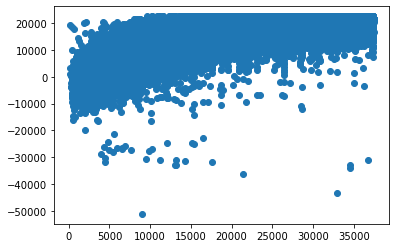

In [350]:
plt.scatter(y_train,y_hat)
plt.show()                        #not the best results
                                  #we dont have a good match betweeen targets and predictions

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_usd', ylabel='Density'>

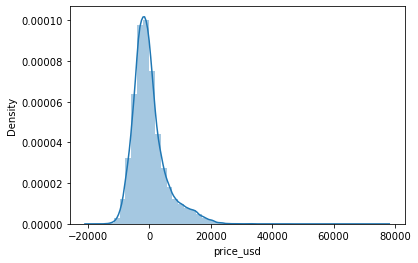

In [351]:
sns.distplot(y_train - y_hat)   #residual plot = difference between the targets and the predictions

In [352]:
regressor.coef_

array([ 9.40868624e+02, -1.69238063e-02])

In [353]:
regressor.intercept_

-1879939.479073483

In [354]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ",(metrics.mean_absolute_error(y_pred,y_test)))
print("MSE: ",(metrics.mean_squared_error(y_pred,y_test)))


MAE:  4018.958757494746
MSE:  30278519.836497355


In [355]:
import statsmodels.api as sm
x = sm.add_constant(x)
y= df["price_usd"]


In [356]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

In [357]:
model = sm.OLS(y_train,x_train).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                 OLS                Adj. R-squared:       0.556       
Dependent Variable:    price_usd          AIC:                  1625987.5802
Date:                  2022-12-01 13:08   BIC:                  1626015.4874
No. Observations:      81016              Log-Likelihood:       -8.1299e+05 
Df Model:              2                  F-statistic:          5.068e+04   
Df Residuals:          81013              Prob (F-statistic):   0.00        
R-squared:             0.556              Scale:                3.0464e+07  
----------------------------------------------------------------------------
            Coef.      Std.Err.     t     P>|t|      [0.025        0.975]   
----------------------------------------------------------------------------
const   -1879939.4791 9997.0133 -188.0501 0.0000 -1899533.5578 -1860345.4004
year         940.8686    4.9515  190.0152 0.0000      931.1636      950.5736
mileage       -0.0169    0.0003  -53.2708 0.0000       -0.0175       -0.0163
----------------------------------------------------------------------------
Omnibus:               24592.795         Durbin-Watson:            2.006    
Prob(Omnibus):         0.000             Jarque-Bera (JB):         97920.812
Skew:                  1.469             Prob(JB):                 0.000    
Kurtosis:              7.514             Condition No.:            89138320 
============================================================================
* The condition number is large (9e+07). This might indicate
strong multicollinearity or other numerical problems.
"""

In [358]:
 df_model = pd.get_dummies(df["mark"],drop_first=True)
df.head()

,mark,year,mileage,price_usd
0,opel,2015,139568,7898.00
1,opel,2018,31991,17270.22
2,opel,2015,278437,5940.00
3,opel,2016,47600,6776.00
4,opel,2014,103000,7898.00


In [359]:
del df["mark"]

df2=pd.concat([df,df_model],axis=1)
#del df["mark"]
df2.head()


,year,mileage,price_usd,audi,bmw,chevrolet,citroen,fiat,ford,honda,...,mitsubishi,nissan,opel,peugeot,renault,seat,skoda,toyota,volkswagen,volvo
0,2015,139568,7898.00,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2018,31991,17270.22,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2015,278437,5940.00,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2016,47600,6776.00,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2014,103000,7898.00,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [360]:
df2.columns

Index(['year', 'mileage', 'price_usd', 'audi', 'bmw', 'chevrolet', 'citroen',
       'fiat', 'ford', 'honda', 'hyundai', 'kia', 'mazda', 'mercedes-benz',
       'mini', 'mitsubishi', 'nissan', 'opel', 'peugeot', 'renault', 'seat',
       'skoda', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

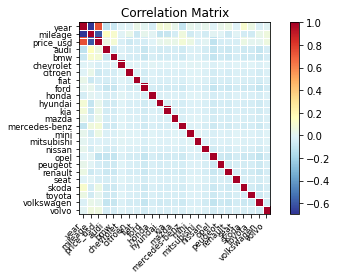

In [361]:
import statsmodels.api as sm
corr=df2.corr()
sm.graphics.plot_corr(corr,xnames=list(corr.columns))
plt.show()

In [362]:
x2 = df2.drop("price_usd",axis=1)
y2= df2["price_usd"]

In [363]:
from sklearn.model_selection import train_test_split  
x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.2, random_state=0)  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x2_train, y2_train)  
y2_pred= regressor.predict(x2_test) 
print('Train Score: ', regressor.score(x2_train, y2_train))  
print('Test Score: ', regressor.score(x2_test, y2_test))  
from sklearn.metrics import r2_score
score = r2_score(y2_test,y2_pred)
score

Train Score:  0.6777783746642102
Test Score:  0.6861111351633038


0.6861111351633038

In [364]:
import statsmodels.api as sm
x2 = sm.add_constant(x2)
y2= df2["price_usd"]


In [365]:
from sklearn.model_selection import train_test_split  
x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.2, random_state=0) 

In [366]:
model = sm.OLS(y2,x2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     8944.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:08:30   Log-Likelihood:            -9.9985e+05
No. Observations:              101271   AIC:                         2.000e+06
Df Residuals:                  101246   BIC:                         2.000e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.954e+06   7744.731   -252.240      0.000   -1.97e+06   -1.94e+06
year            977.3389      3.836    254.759      0.000     969.820     984.858
mileage          -0.0235      0.000    -94.415      0.000      -0.024      -0.023
audi           5749.6969    202.331     28.417      0.000    5353.131    6146.263
bmw            6041.0382    202.466     29.837      0.000    5644.207    6437.869
chevrolet     -1882.2397    275.722     -6.827      0.000   -2422.651   -1341.828
citroen       -1488.0003    215.574     -6.902      0.000   -1910.523   -1065.478
fiat          -3274.3157    215.222    -15.214      0.000   -3696.147   -2852.484
ford            -88.4839    201.835     -0.438      0.661    -484.079     307.111
honda          1924.4432    221.926      8.672      0.000    1489.470    2359.416
hyundai       -1311.6235    209.917     -6.248      0.000   -1723.059    -900.188
kia            -312.6383    211.307     -1.480      0.139    -726.798     101.521
mazda          1270.2739    214.977      5.909      0.000     848.921    1691.627
mercedes-benz  7310.0338    207.175     35.284      0.000    6903.974    7716.094
mini           2749.3084    244.671     11.237      0.000    2269.756    3228.860
mitsubishi    -1230.7087    244.517     -5.033      0.000   -1709.959    -751.458
nissan          -28.3616    213.436     -0.133      0.894    -446.693     389.969
opel          -1452.6722    201.210     -7.220      0.000   -1847.041   -1058.304
peugeot       -1130.8549    207.021     -5.463      0.000   -1536.614    -725.095
renault       -1431.9601    203.951     -7.021      0.000   -1831.702   -1032.218
seat           -605.9012    214.874     -2.820      0.005   -1027.051    -184.752
skoda          -206.6917    205.900     -1.004      0.315    -610.254     196.871
toyota            4.3795    207.006      0.021      0.983    -401.350     410.109
volkswagen     2170.8206    201.320     10.783      0.000    1776.236    2565.406
volvo          4860.6105    215.694     22.535      0.000    4437.854    5283.367
==============================================================================
Omnibus:                    32362.149   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           224907.107
Skew:                           1.361   Prob(JB):                         0.00
Kurtosis:                       9.774   Cond. No.                     9.08e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [367]:
#we can remove columns with p value > 0.05 like ford,kia,nissan,skoda,toyota

In [368]:
df3 = df2.drop(["ford","kia","nissan","skoda","toyota"],axis=1)
df3.columns


Index(['year', 'mileage', 'price_usd', 'audi', 'bmw', 'chevrolet', 'citroen',
       'fiat', 'honda', 'hyundai', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'opel', 'peugeot', 'renault', 'seat', 'volkswagen',
       'volvo'],
      dtype='object')

In [369]:
x3 = df3.drop("price_usd",axis=1)
y3= df3["price_usd"]

In [370]:
import statsmodels.api as sm
x3 = sm.add_constant(x3)
y3= df["price_usd"]


In [371]:
from sklearn.model_selection import train_test_split  
x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.2, random_state=0) 

model = sm.OLS(y3,x3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 1.130e+04
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:08:30   Log-Likelihood:            -9.9985e+05
No. Observations:              101271   AIC:                         2.000e+06
Df Residuals:                  101251   BIC:                         2.000e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.952e+06   7712.787   -253.077      0.000   -1.97e+06   -1.94e+06
year            976.4859      3.819    255.671      0.000     969.000     983.972
mileage          -0.0235      0.000    -94.887      0.000      -0.024      -0.023
audi           5864.4739     59.907     97.893      0.000    5747.057    5981.891
bmw            6156.1639     60.167    102.318      0.000    6038.237    6274.091
chevrolet     -1767.1249    196.540     -8.991      0.000   -2152.341   -1381.908
citroen       -1372.0805     95.167    -14.418      0.000   -1558.607   -1185.554
fiat          -3157.6323     93.974    -33.601      0.000   -3341.820   -2973.444
honda          2039.1178    108.990     18.709      0.000    1825.499    2252.736
hyundai       -1193.7949     80.788    -14.777      0.000   -1352.138   -1035.451
mazda          1386.9345     93.489     14.835      0.000    1203.697    1570.172
mercedes-benz  7424.3232     74.710     99.376      0.000    7277.893    7570.753
mini           2865.8409    149.588     19.158      0.000    2572.650    3159.032
mitsubishi    -1114.4556    149.443     -7.457      0.000   -1407.362    -821.550
opel          -1336.7690     55.298    -24.174      0.000   -1445.152   -1228.386
peugeot       -1014.2273     73.463    -13.806      0.000   -1158.214    -870.240
renault       -1315.2576     64.176    -20.495      0.000   -1441.041   -1189.474
seat           -490.1231     93.529     -5.240      0.000    -673.440    -306.807
volkswagen     2286.6371     55.787     40.988      0.000    2177.294    2395.980
volvo          4977.0976     95.359     52.193      0.000    4790.196    5163.999
==============================================================================
Omnibus:                    32330.555   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           224364.713
Skew:                           1.360   Prob(JB):                         0.00
Kurtosis:                       9.766   Cond. No.                     9.04e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.04e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [372]:
df3.corr().style.background_gradient(cmap='coolwarm')     #we dont have any multicollinearity

,year,mileage,price_usd,audi,bmw,chevrolet,citroen,fiat,honda,hyundai,mazda,mercedes-benz,mini,mitsubishi,opel,peugeot,renault,seat,volkswagen,volvo
year,1.000000,-0.691391,0.736598,-0.114825,-0.083149,-0.015872,-0.013560,0.033920,-0.045346,0.089640,0.026820,-0.100085,0.018736,0.006955,-0.016158,0.025670,0.045272,-0.012189,-0.028102,0.001791
mileage,-0.691391,1.000000,-0.597390,0.158427,0.110702,-0.005703,0.035001,-0.083124,0.001970,-0.096892,-0.045375,0.068306,-0.059568,-0.025915,-0.002359,-0.010370,-0.074033,-0.004841,0.033395,0.064677
price_usd,0.736598,-0.597390,1.000000,0.053469,0.092951,-0.037052,-0.070561,-0.048974,-0.016927,0.019858,0.029415,0.083170,0.045136,-0.019004,-0.115393,-0.044041,-0.038016,-0.043251,0.012377,0.058709
audi,-0.114825,0.158427,0.053469,1.000000,-0.088558,-0.022839,-0.049547,-0.050308,-0.042663,-0.059913,-0.050476,-0.066453,-0.030354,-0.030339,-0.099087,-0.067126,-0.079967,-0.050485,-0.097931,-0.049604
bmw,-0.083149,0.110702,0.092951,-0.088558,1.000000,-0.022490,-0.048790,-0.049540,-0.042012,-0.058998,-0.049705,-0.065438,-0.029890,-0.029875,-0.097574,-0.066101,-0.078746,-0.049714,-0.096435,-0.048846
chevrolet,-0.015872,-0.005703,-0.037052,-0.022839,-0.022490,1.000000,-0.012583,-0.012776,-0.010835,-0.015215,-0.012819,-0.016876,-0.007709,-0.007705,-0.025164,-0.017047,-0.020308,-0.012821,-0.024870,-0.012597
citroen,-0.013560,0.035001,-0.070561,-0.049547,-0.048790,-0.012583,1.000000,-0.027717,-0.023505,-0.033009,-0.027809,-0.036612,-0.016723,-0.016715,-0.054591,-0.036983,-0.044057,-0.027814,-0.053954,-0.027329
fiat,0.033920,-0.083124,-0.048974,-0.050308,-0.049540,-0.012776,-0.027717,1.000000,-0.023866,-0.033515,-0.028236,-0.037174,-0.016980,-0.016972,-0.055430,-0.037551,-0.044734,-0.028241,-0.054783,-0.027749
honda,-0.045346,0.001970,-0.016927,-0.042663,-0.042012,-0.010835,-0.023505,-0.023866,1.000000,-0.028422,-0.023946,-0.031525,-0.014400,-0.014393,-0.047007,-0.031845,-0.037936,-0.023950,-0.046458,-0.023532
hyundai,0.089640,-0.096892,0.019858,-0.059913,-0.058998,-0.015215,-0.033009,-0.033515,-0.028422,1.000000,-0.033627,-0.044271,-0.020222,-0.020212,-0.066012,-0.044720,-0.053274,-0.033633,-0.065242,-0.033046


In [373]:
df3.columns

Index(['year', 'mileage', 'price_usd', 'audi', 'bmw', 'chevrolet', 'citroen',
       'fiat', 'honda', 'hyundai', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'opel', 'peugeot', 'renault', 'seat', 'volkswagen',
       'volvo'],
      dtype='object')